<a href="https://colab.research.google.com/github/RishiLal/CV-FirstHtmlTemplate/blob/main/MLBProj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
mapped_values = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(mapped_values)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
X=df.drop('Species', axis=1)
y=df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(y_pred[:5])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
print(f'R^2 score: {r2:.2f}')
print(lin_reg.score(X_test, y_test))

predictions = lin_reg.predict(X_test)
print(predictions)

(120, 5) (30, 5) (120,) (30,)
[ 1.8979321   0.91196487 -0.0193922   1.80091323 -0.14204593]
Mean squared error: 0.03
R^2 score: 0.95
0.9504982174069627
[ 1.8979321   0.91196487 -0.0193922   1.80091323 -0.14204593  1.95195753
  0.08580285  1.29980041  1.21710569  1.04650972  1.826523    1.02720179
  1.16003846  1.06933597  1.14475579  0.05635941  1.2511518   1.26685329
  0.16214061 -0.08928719  1.80611104  1.18655657  0.06545488 -0.10745636
  1.72947833 -0.10631763  0.24197384  1.2805419   1.06363649  0.07156604]


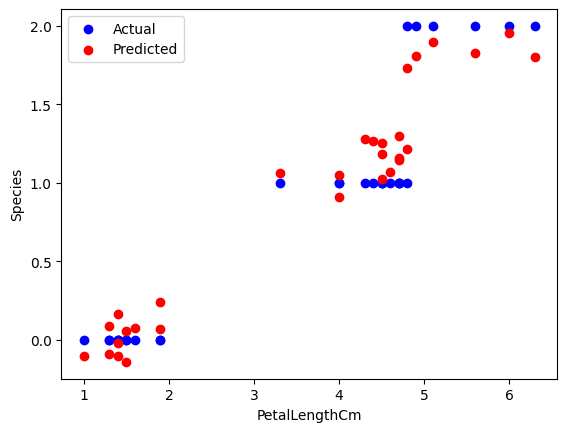

In [23]:
plt.scatter(X_test['PetalLengthCm'], y_test, color='blue', label='Actual')
plt.scatter(X_test['PetalLengthCm'], predictions, color='red', label='Predicted')
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.legend()
plt.show()